## Bayesian Network
#### Dropped 10 features, 50:50 test:train ratio.
#### ~90.4 accuracy

In [154]:
import pandas as pd

df = pd.read_csv('../3_to_classes_.csv').map(str)
df = df.drop(columns=[ 'AnyHealthcare', 'Fruits', 'NoDocbcCost', 'Sex', 'CholCheck', 'PhysActivity', 'GenHlth', 'Age', 'Veggies', 'HvyAlcoholConsump'])

train = df.sample(frac=0.50, random_state = 42)
test = df.drop(train.index) 

In [155]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import K2, HillClimbSearch

hillclimb = HillClimbSearch(train)
model = hillclimb.estimate(scoring_method=K2(train))

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Diabetes_binary': 'C', 'HighBP': 'C', 'HighChol': 'C', 'NEW_BMI_class': 'C', 'Smoker': 'C', 'Stroke': 'C', 'HeartDiseaseorAttack': 'C', 'MetHlth_Class': 'C', 'PhyHlth_Class': 'C', 'DiffWalk': 'C', 'Education': 'C', 'Income': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Diabetes_binary': 'C', 'HighBP': 'C', 'HighChol': 'C', 'NEW_BMI_class': 'C', 'Smoker': 'C', 'Stroke': 'C', 'HeartDiseaseorAttack': 'C', 'MetHlth_Class': 'C', 'PhyHlth_Class': 'C', 'DiffWalk': 'C', 'Education': 'C', 'Income': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Diabetes_binary': 'C', 'HighBP': 'C', 'HighChol': 'C', 'NEW_BMI_class': 'C', 'Smoker': 'C', 'Stroke': 'C', 'HeartDiseaseorAttack': 'C', 'MetHlth_Class': 'C', 'PhyHlth_Class': 'C', 'DiffWalk': 'C', 'Education': 'C', 'Inc

  0%|          | 0/1000000 [00:00<?, ?it/s]

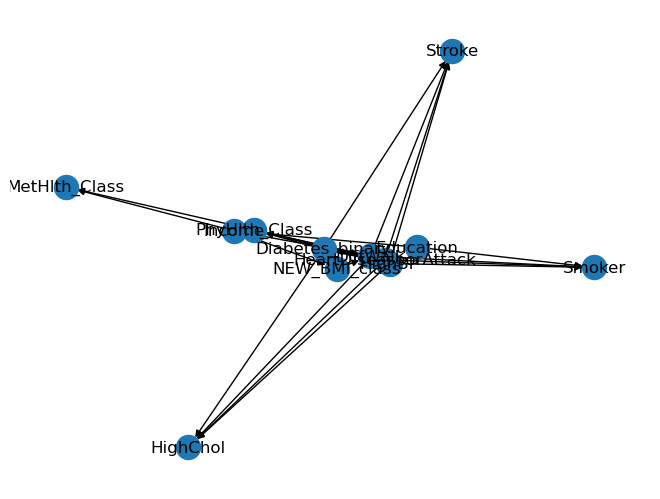

In [156]:
bayes = DiscreteBayesianNetwork(model)

import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_nodes_from(bayes.nodes())
G.add_edges_from(bayes.edges())
nx.draw(G, with_labels=True)
plt.draw()

In [157]:
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator
bayes.fit(train, estimator=MaximumLikelihoodEstimator)
predict = VariableElimination(bayes)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Diabetes_binary': 'C', 'HighBP': 'C', 'HighChol': 'C', 'NEW_BMI_class': 'C', 'Smoker': 'C', 'Stroke': 'C', 'HeartDiseaseorAttack': 'C', 'MetHlth_Class': 'C', 'PhyHlth_Class': 'C', 'DiffWalk': 'C', 'Education': 'C', 'Income': 'C'}


In [158]:
correct, total = 0,0
print("Computing Accuracy for Test Set")
y_true, y_pred = [],[]

for i, row in test.iterrows():
    
    result = predict.query(variables=['Diabetes_binary'], evidence={'HighBP': row['HighBP'], 'HighChol': row['HighChol'], 'NEW_BMI_class': row['NEW_BMI_class'], 'Smoker': row['Smoker'], 'Stroke': row['Stroke'], 'HeartDiseaseorAttack': row['HeartDiseaseorAttack'], 'MetHlth_Class': row['MetHlth_Class'], 'DiffWalk': row['DiffWalk'], 'PhyHlth_Class': row['PhyHlth_Class'],  'Education': row['Education'], 'Income': row['Income']})
    # print((result.values[1]))
    # print(row)
    if(str(round(result.values[1])) == row['Diabetes_binary']):
        correct+=1
    total+=1
    y_true.append(row['Diabetes_binary'])
    y_pred.append(str(round(result.values[1])))

print(f"Test Accuracy: {(correct*100)/total}")

Computing Accuracy for Test Set
Test Accuracy: 90.36100265942397


In [159]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[16679   977]
 [ 2430 15260]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     17656
           1       0.94      0.86      0.90     17690

    accuracy                           0.90     35346
   macro avg       0.91      0.90      0.90     35346
weighted avg       0.91      0.90      0.90     35346



In [160]:
correct, total = 0,0
print("Computing Accuracy for Train Set")
y_true, y_pred = [],[]

for i, row in train.iterrows():
    
    result = predict.query(variables=['Diabetes_binary'], evidence={'HighBP': row['HighBP'], 'HighChol': row['HighChol'], 'NEW_BMI_class': row['NEW_BMI_class'], 'Smoker': row['Smoker'], 'Stroke': row['Stroke'], 'HeartDiseaseorAttack': row['HeartDiseaseorAttack'], 'MetHlth_Class': row['MetHlth_Class'], 'DiffWalk': row['DiffWalk'], 'PhyHlth_Class': row['PhyHlth_Class'], 'Education': row['Education'], 'Income': row['Income'] })
    if(str(round(result.values[1])) == row['Diabetes_binary']):
        correct+=1
    total+=1
    y_true.append(row['Diabetes_binary'])
    y_pred.append(str(round(result.values[1])))

print(f"Train Accuracy: {(correct*100)/total}")

Computing Accuracy for Train Set
Train Accuracy: 90.28744412380468


In [161]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[16678  1012]
 [ 2421 15235]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     17690
           1       0.94      0.86      0.90     17656

    accuracy                           0.90     35346
   macro avg       0.91      0.90      0.90     35346
weighted avg       0.91      0.90      0.90     35346



In [162]:
bayes.save("bayesian_network.bif", filetype="bif")